In [ ]:
cd /content/drive/MyDrive/Google Colab/Md. Mahmudul Hasan Shahin Shahin | Infolytx AI ML Trainee Program/Computer Vision

/content/drive/MyDrive/Google Colab/Infolytx/Computer Vision


# import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
%matplotlib inline

# import keras library

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

# Import Data set

In [ ]:
train_data = pd.read_csv('Data/training.csv')
test_data = pd.read_csv('Data/test.csv')
test_dataY = pd.read_csv('Data/IdLookupTable.csv')

In [ ]:
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
test_data.describe()

,ImageId
count,1783.000000
mean,892.000000
std,514.852082
min,1.000000
25%,446.500000
50%,892.000000
75%,1337.500000
max,1783.000000


In [ ]:
train_data.shape
train_data.isnull().any().value_counts()
train_data.fillna(method = 'ffill',inplace = True)
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [ ]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    if i<=5:
      print(img)
    imag.append(img)

['238', '236', '237', '238', '240', '240', '239', '241', '241', '243', '240', '239', '231', '212', '190', '173', '148', '122', '104', '92', '79', '73', '74', '73', '73', '74', '81', '74', '60', '64', '75', '86', '93', '102', '100', '105', '109', '114', '121', '127', '132', '134', '137', '137', '140', '139', '138', '137', '137', '140', '141', '143', '144', '147', '148', '149', '147', '147', '148', '145', '147', '144', '146', '147', '147', '143', '134', '130', '130', '128', '116', '104', '98', '90', '82', '78', '85', '88', '86', '80', '77', '87', '108', '111', '115', '128', '133', '188', '242', '252', '250', '248', '251', '250', '250', '250', '235', '238', '236', '238', '238', '237', '238', '242', '241', '239', '237', '233', '215', '195', '187', '156', '119', '103', '93', '78', '68', '73', '75', '75', '72', '75', '70', '61', '66', '77', '91', '96', '106', '108', '113', '120', '125', '131', '134', '138', '135', '138', '139', '145', '144', '144', '142', '140', '141', '141', '148', '147', '

# Check the image of train data set.

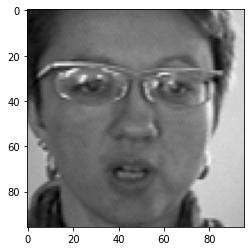

In [ ]:
len(imag[0])
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96,1)
X_train[0].shape
plt.imshow(X_train[10].reshape(96,96),cmap='gray')
plt.show()

In [ ]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

# CNN Model building and training.

In [ ]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(X_train,y_train,epochs = 2,batch_size = 16,validation_split = 0.2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_24 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)       

# Check the image of test data set.

In [ ]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

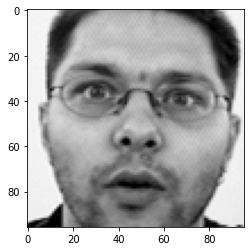

In [ ]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96,1) 
plt.imshow(X_test[10].reshape(96,96),cmap = 'gray')
plt.show()

# Predict the test data with trained model.

In [ ]:
pred = model.predict(X_test)

lookid_list = list(test_dataY['FeatureName'])
imageID = list(test_dataY['ImageId']-1)
pre_list = list(pred)

rowid = test_dataY['RowId']
rowid=list(rowid)

feature = []
for f in list(test_dataY['FeatureName']):
    feature.append(lookid_list.index(f))

preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

rowid = pd.Series(rowid,name = 'RowId')

loc = pd.Series(preded,name = 'Location')

final_out = pd.concat([rowid,loc],axis = 1)
final_out

,RowId,Location
0,1,67.059494
1,2,36.219891
2,3,30.237740
3,4,34.306198
4,5,59.185585
...,...,...
27119,27120,37.143356
27120,27121,48.682503
27121,27122,65.139740
27122,27123,47.694336
